# Prophet - example 2

This notebook is strongly inspired from this [web page](http://pythondata.com/stock-market-forecasting-with-prophet/).

## Facebook daily stock price

In [1]:
%matplotlib inline

import numpy as np
print("Numpy version: {}".format(np.__version__))

import pandas as pd
print("Pandas version: {}".format(pd.__version__))

import warnings
warnings.filterwarnings('ignore')

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
print("pandas_datareader version: {}".format(pandas_datareader.__version__))
import pandas_datareader.data as pdr

import fix_yahoo_finance as yf
print("fix_yahoo_finance version: {}".format(yf.__version__))
yf.pdr_override()

import fbprophet as Prophet
print("Prophet version: {}".format(Prophet.__version__))

import sklearn
print("Scikit-learn version: {}".format(sklearn.__version__))
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Numpy version: 1.14.3
Pandas version: 0.23.0
pandas_datareader version: 0.6.0
fix_yahoo_finance version: 0.0.21
Prophet version: 0.2.1
Scikit-learn version: 0.19.1


In [2]:
fb = pdr.get_data_yahoo("FB", start="2012-04-18", end="2018-06-05")
fb.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


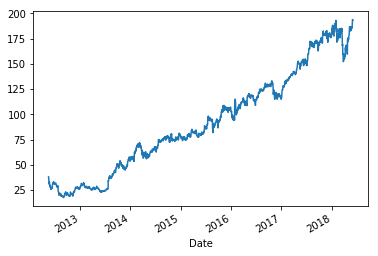

In [3]:
fb.Close.plot()

In [4]:
fb['ds'] = fb.index
fb['y'] = np.log(fb.Close)
fb.head()

,Open,High,Low,Close,Adj Close,Volume,ds,y
Date,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,2012-05-18,3.643621
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,2012-05-21,3.527242
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,2012-05-22,3.433987
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,2012-05-23,3.465736
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,2012-05-24,3.497416


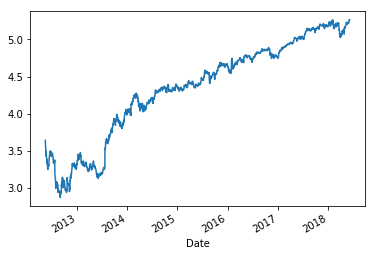

In [5]:
fb.y.plot()

In [6]:
model = Prophet.Prophet(daily_seasonality=False)
model.fit(fb);

In [7]:
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.
forecast = model.predict(future)

In [8]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2012-05-18,3.591699,3.474279,3.613332,3.591699,3.591699,-0.044937,-0.044937,-0.044937,-0.044937,-0.044937,-0.044937,-0.003682,-0.003682,-0.003682,-0.041255,-0.041255,-0.041255,3.546762
1,2012-05-21,3.573854,3.455805,3.587977,3.573854,3.573854,-0.053820,-0.053820,-0.053820,-0.053820,-0.053820,-0.053820,-0.006578,-0.006578,-0.006578,-0.047242,-0.047242,-0.047242,3.520034
2,2012-05-22,3.567905,3.439334,3.575975,3.567905,3.567905,-0.057156,-0.057156,-0.057156,-0.057156,-0.057156,-0.057156,-0.007649,-0.007649,-0.007649,-0.049507,-0.049507,-0.049507,3.510749
3,2012-05-23,3.561957,3.431107,3.578745,3.561957,3.561957,-0.056885,-0.056885,-0.056885,-0.056885,-0.056885,-0.056885,-0.005026,-0.005026,-0.005026,-0.051859,-0.051859,-0.051859,3.505072
4,2012-05-24,3.556009,3.427317,3.567258,3.556009,3.556009,-0.057367,-0.057367,-0.057367,-0.057367,-0.057367,-0.057367,-0.003104,-0.003104,-0.003104,-0.054263,-0.054263,-0.054263,3.498641


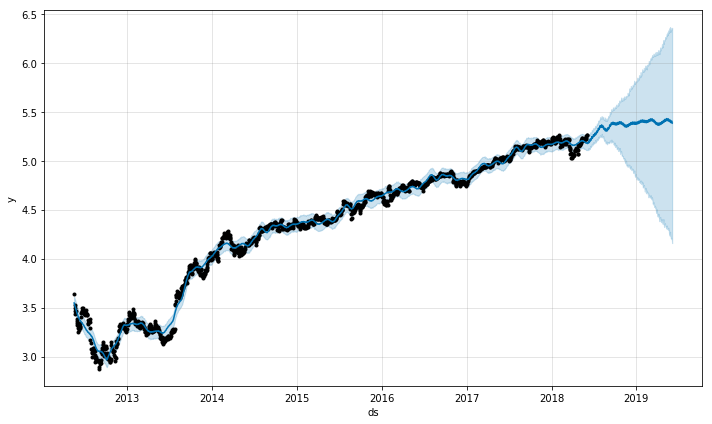

In [9]:
figure = model.plot(forecast)

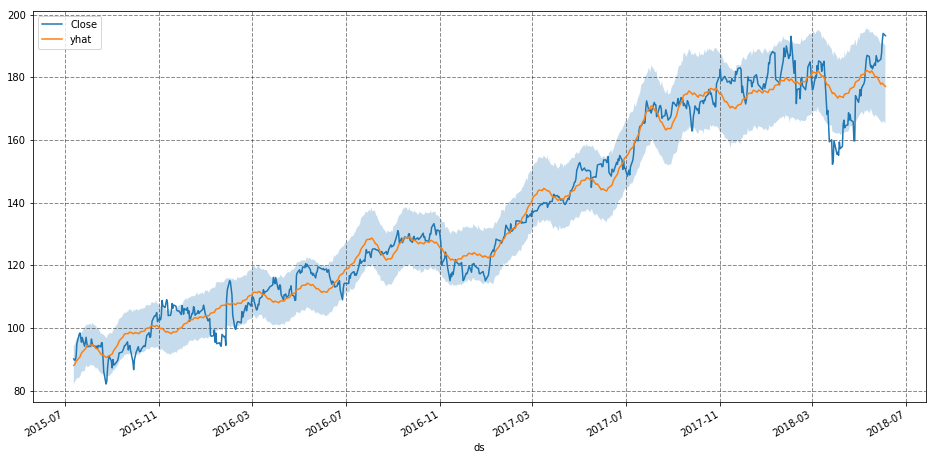

In [10]:
two_years = forecast.set_index('ds').join(fb)
two_years = two_years[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(730)
two_years['yhat'] = np.exp(two_years.yhat)
two_years['yhat_lower'] = np.exp(two_years.yhat_lower)
two_years['yhat_upper'] = np.exp(two_years.yhat_upper)
ax = two_years[['Close', 'yhat']].plot(figsize=(16, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(two_years.index, two_years['yhat_upper'], two_years['yhat_lower'], alpha=.25)

In [11]:
two_years_AE = (two_years.yhat - two_years.Close)
print(two_years_AE.describe())

count    730.000000
mean      -0.068108
std        5.419997
min      -16.213276
25%       -3.721161
50%       -0.461268
75%        3.740736
max       22.570113
dtype: float64


In [12]:
r2_score(two_years.Close, two_years.yhat)

0.967881381706509

In [13]:
mean_squared_error(two_years.Close, two_years.yhat)

29.3407683793415

In [14]:
mean_absolute_error(two_years.Close, two_years.yhat)

4.211169775323191